# Mask RCNN - train tornado dataset
Zhiang Chen, Nov 22, 2018
#### 1. import libraries

In [1]:
import os
import sys
import random
import math
import time
import numpy as np
import cv2
import matplotlib.pyplot as plt

from mrcnn import utils
import mrcnn.model as modellib
from mrcnn import visualize
from mrcnn.model import log

import tornadoo as tornado

Using TensorFlow backend.


#### 2. import dataset

In [2]:
config = tornado.TornadoConfig()
config.display()

train_dataset = tornado.TornadoDataset()
valid_dataset = tornado.TornadoDataset()

train_dataset.load_tornado('../../dataset/tornado', 'train')
valid_dataset.load_tornado('../../dataset/tornado', 'val')

train_dataset.prepare()
valid_dataset.prepare()


Configurations:
BACKBONE                       resnet101
BACKBONE_STRIDES               [4, 8, 16, 32, 64]
BATCH_SIZE                     1
BBOX_STD_DEV                   [0.1 0.1 0.2 0.2]
COMPUTE_BACKBONE_SHAPE         None
DETECTION_MAX_INSTANCES        100
DETECTION_MIN_CONFIDENCE       0.9
DETECTION_NMS_THRESHOLD        0.3
FPN_CLASSIF_FC_LAYERS_SIZE     1024
GPU_COUNT                      1
GRADIENT_CLIP_NORM             5.0
IMAGES_PER_GPU                 1
IMAGE_CHANNEL                  3
IMAGE_MAX_DIM                  1024
IMAGE_META_SIZE                15
IMAGE_MIN_DIM                  800
IMAGE_MIN_SCALE                0
IMAGE_RESIZE_MODE              square
IMAGE_SHAPE                    [1024 1024    3]
LEARNING_MOMENTUM              0.9
LEARNING_RATE                  0.001
LOSS_WEIGHTS                   {'rpn_class_loss': 1.0, 'rpn_bbox_loss': 1.0, 'mrcnn_class_loss': 1.0, 'mrcnn_bbox_loss': 1.0, 'mrcnn_mask_loss': 1.0}
MASK_POOL_SIZE                 14
MASK_SHAPE         

#### 3. create network model

In [3]:
ROOT_DIR = os.path.abspath("../../")
MODEL_DIR = os.path.join(ROOT_DIR, "logs")
COCO_MODEL_PATH = os.path.join(ROOT_DIR, "mask_rcnn_coco.h5")

In [4]:
# the model will be saved under ../../logs
model = modellib.MaskRCNN(mode="training", config=config,
                          model_dir=MODEL_DIR)

In [5]:
# Which weights to start with?
init_with = "coco"  # imagenet, coco, or last

if init_with == "imagenet":
    model.load_weights(model.get_imagenet_weights(), by_name=True)
elif init_with == "coco":
    # Load weights trained on MS COCO, but skip layers that
    # are different due to the different number of classes
    # See README for instructions to download the COCO weights
    model.load_weights(COCO_MODEL_PATH, by_name=True,
                       exclude=["mrcnn_class_logits", "mrcnn_bbox_fc", 
                                "mrcnn_bbox", "mrcnn_mask"])
elif init_with == "last":
    # Load the last model you trained and continue training
    model.load_weights(model.find_last(), by_name=True)

In [5]:
model_path = os.path.join(ROOT_DIR, "logs/tornado20181125T0604/mask_rcnn_tornado_0648.h5")
#model_path = model.find_last()

# Load trained weights
print("Loading weights from ", model_path)
model.load_weights(model_path, by_name=True)

Loading weights from  /models/Mask_RCNN/logs/tornado20181125T0604/mask_rcnn_tornado_0648.h5
Re-starting from epoch 648


#### 4. training model

In [6]:
model.train(train_dataset, valid_dataset, 
            learning_rate=config.LEARNING_RATE, 
            epochs=400, 
            layers='heads')


Starting at epoch 0. LR=0.001

Checkpoint Path: /models/Mask_RCNN/logs/tornado20181125T0604/mask_rcnn_tornado_{epoch:04d}.h5
Selecting layers to train
fpn_c5p5               (Conv2D)
fpn_c4p4               (Conv2D)
fpn_c3p3               (Conv2D)
fpn_c2p2               (Conv2D)
fpn_p5                 (Conv2D)
fpn_p2                 (Conv2D)
fpn_p3                 (Conv2D)
fpn_p4                 (Conv2D)
In model:  rpn_model
    rpn_conv_shared        (Conv2D)
    rpn_class_raw          (Conv2D)
    rpn_bbox_pred          (Conv2D)
mrcnn_mask_conv1       (TimeDistributed)
mrcnn_mask_bn1         (TimeDistributed)
mrcnn_mask_conv2       (TimeDistributed)
mrcnn_mask_bn2         (TimeDistributed)
mrcnn_class_conv1      (TimeDistributed)
mrcnn_class_bn1        (TimeDistributed)
mrcnn_mask_conv3       (TimeDistributed)
mrcnn_mask_bn3         (TimeDistributed)
mrcnn_class_conv2      (TimeDistributed)
mrcnn_class_bn2        (TimeDistributed)
mrcnn_mask_conv4       (TimeDistributed)
mrcnn_mask_b

/usr/local/lib/python3.5/dist-packages/tensorflow/python/ops/gradients_impl.py:108: UserWarning: Converting sparse IndexedSlices to a dense Tensor of unknown shape. This may consume a large amount of memory.
  "Converting sparse IndexedSlices to a dense Tensor of unknown shape. "
/usr/local/lib/python3.5/dist-packages/keras/engine/training_generator.py:46: UserWarning: Using a generator with `use_multiprocessing=True` and multiple workers may duplicate your data. Please consider using the`keras.utils.Sequence class.
  UserWarning('Using a generator with `use_multiprocessing=True`'


Epoch 1/400
100/100 [==============================] - 87s 872ms/step - loss: 1.5146 - rpn_class_loss: 0.0399 - rpn_bbox_loss: 0.2782 - mrcnn_class_loss: 0.1497 - mrcnn_bbox_loss: 0.6439 - mrcnn_mask_loss: 0.4030 - val_loss: 1.3112 - val_rpn_class_loss: 0.0315 - val_rpn_bbox_loss: 0.3291 - val_mrcnn_class_loss: 0.0653 - val_mrcnn_bbox_loss: 0.5352 - val_mrcnn_mask_loss: 0.3502
Epoch 2/400
100/100 [==============================] - 74s 739ms/step - loss: 1.1225 - rpn_class_loss: 0.0273 - rpn_bbox_loss: 0.2920 - mrcnn_class_loss: 0.0853 - mrcnn_bbox_loss: 0.4283 - mrcnn_mask_loss: 0.2895 - val_loss: 1.0997 - val_rpn_class_loss: 0.0241 - val_rpn_bbox_loss: 0.2873 - val_mrcnn_class_loss: 0.0842 - val_mrcnn_bbox_loss: 0.4221 - val_mrcnn_mask_loss: 0.2820
Epoch 3/400
100/100 [==============================] - 74s 737ms/step - loss: 0.9970 - rpn_class_loss: 0.0248 - rpn_bbox_loss: 0.2282 - mrcnn_class_loss: 0.0917 - mrcnn_bbox_loss: 0.3745 - mrcnn_mask_loss: 0.2777 - val_loss: 1.1347 - val_rp

100/100 [==============================] - 75s 749ms/step - loss: 0.6752 - rpn_class_loss: 0.0101 - rpn_bbox_loss: 0.2220 - mrcnn_class_loss: 0.0624 - mrcnn_bbox_loss: 0.1809 - mrcnn_mask_loss: 0.1998 - val_loss: 0.9704 - val_rpn_class_loss: 0.0135 - val_rpn_bbox_loss: 0.3876 - val_mrcnn_class_loss: 0.0608 - val_mrcnn_bbox_loss: 0.2588 - val_mrcnn_mask_loss: 0.2496
Epoch 44/400
100/100 [==============================] - 74s 740ms/step - loss: 0.7237 - rpn_class_loss: 0.0117 - rpn_bbox_loss: 0.2281 - mrcnn_class_loss: 0.0695 - mrcnn_bbox_loss: 0.2052 - mrcnn_mask_loss: 0.2092 - val_loss: 0.8596 - val_rpn_class_loss: 0.0128 - val_rpn_bbox_loss: 0.2798 - val_mrcnn_class_loss: 0.0872 - val_mrcnn_bbox_loss: 0.2421 - val_mrcnn_mask_loss: 0.2376
Epoch 45/400
100/100 [==============================] - 75s 747ms/step - loss: 0.7200 - rpn_class_loss: 0.0114 - rpn_bbox_loss: 0.2490 - mrcnn_class_loss: 0.0686 - mrcnn_bbox_loss: 0.1914 - mrcnn_mask_loss: 0.1996 - val_loss: 0.7777 - val_rpn_class_lo

100/100 [==============================] - 74s 736ms/step - loss: 0.5816 - rpn_class_loss: 0.0093 - rpn_bbox_loss: 0.2148 - mrcnn_class_loss: 0.0560 - mrcnn_bbox_loss: 0.1332 - mrcnn_mask_loss: 0.1683 - val_loss: 0.8879 - val_rpn_class_loss: 0.0088 - val_rpn_bbox_loss: 0.3584 - val_mrcnn_class_loss: 0.0492 - val_mrcnn_bbox_loss: 0.2217 - val_mrcnn_mask_loss: 0.2498
Epoch 86/400
100/100 [==============================] - 74s 744ms/step - loss: 0.5447 - rpn_class_loss: 0.0088 - rpn_bbox_loss: 0.1544 - mrcnn_class_loss: 0.0507 - mrcnn_bbox_loss: 0.1463 - mrcnn_mask_loss: 0.1844 - val_loss: 0.9374 - val_rpn_class_loss: 0.0131 - val_rpn_bbox_loss: 0.4017 - val_mrcnn_class_loss: 0.0625 - val_mrcnn_bbox_loss: 0.2271 - val_mrcnn_mask_loss: 0.2329
Epoch 87/400
100/100 [==============================] - 74s 739ms/step - loss: 0.5461 - rpn_class_loss: 0.0090 - rpn_bbox_loss: 0.1664 - mrcnn_class_loss: 0.0579 - mrcnn_bbox_loss: 0.1352 - mrcnn_mask_loss: 0.1777 - val_loss: 0.9334 - val_rpn_class_lo

100/100 [==============================] - 74s 735ms/step - loss: 0.4345 - rpn_class_loss: 0.0070 - rpn_bbox_loss: 0.1292 - mrcnn_class_loss: 0.0423 - mrcnn_bbox_loss: 0.0971 - mrcnn_mask_loss: 0.1590 - val_loss: 0.9018 - val_rpn_class_loss: 0.0140 - val_rpn_bbox_loss: 0.4215 - val_mrcnn_class_loss: 0.0582 - val_mrcnn_bbox_loss: 0.1788 - val_mrcnn_mask_loss: 0.2293
Epoch 128/400
100/100 [==============================] - 74s 737ms/step - loss: 0.4466 - rpn_class_loss: 0.0072 - rpn_bbox_loss: 0.1353 - mrcnn_class_loss: 0.0462 - mrcnn_bbox_loss: 0.1057 - mrcnn_mask_loss: 0.1522 - val_loss: 0.8718 - val_rpn_class_loss: 0.0112 - val_rpn_bbox_loss: 0.3314 - val_mrcnn_class_loss: 0.0703 - val_mrcnn_bbox_loss: 0.2135 - val_mrcnn_mask_loss: 0.2453
Epoch 129/400
100/100 [==============================] - 74s 738ms/step - loss: 0.4288 - rpn_class_loss: 0.0080 - rpn_bbox_loss: 0.1277 - mrcnn_class_loss: 0.0436 - mrcnn_bbox_loss: 0.1006 - mrcnn_mask_loss: 0.1488 - val_loss: 0.8888 - val_rpn_class_

100/100 [==============================] - 75s 746ms/step - loss: 0.4280 - rpn_class_loss: 0.0082 - rpn_bbox_loss: 0.1475 - mrcnn_class_loss: 0.0425 - mrcnn_bbox_loss: 0.0899 - mrcnn_mask_loss: 0.1398 - val_loss: 0.9543 - val_rpn_class_loss: 0.0142 - val_rpn_bbox_loss: 0.4068 - val_mrcnn_class_loss: 0.0514 - val_mrcnn_bbox_loss: 0.1908 - val_mrcnn_mask_loss: 0.2911
Epoch 170/400
100/100 [==============================] - 74s 739ms/step - loss: 0.3718 - rpn_class_loss: 0.0049 - rpn_bbox_loss: 0.1027 - mrcnn_class_loss: 0.0402 - mrcnn_bbox_loss: 0.0834 - mrcnn_mask_loss: 0.1406 - val_loss: 0.8552 - val_rpn_class_loss: 0.0094 - val_rpn_bbox_loss: 0.3470 - val_mrcnn_class_loss: 0.0525 - val_mrcnn_bbox_loss: 0.1984 - val_mrcnn_mask_loss: 0.2480
Epoch 171/400
100/100 [==============================] - 74s 744ms/step - loss: 0.4413 - rpn_class_loss: 0.0074 - rpn_bbox_loss: 0.1617 - mrcnn_class_loss: 0.0382 - mrcnn_bbox_loss: 0.0902 - mrcnn_mask_loss: 0.1437 - val_loss: 0.9418 - val_rpn_class_

100/100 [==============================] - 74s 738ms/step - loss: 0.3623 - rpn_class_loss: 0.0051 - rpn_bbox_loss: 0.1159 - mrcnn_class_loss: 0.0291 - mrcnn_bbox_loss: 0.0738 - mrcnn_mask_loss: 0.1383 - val_loss: 0.9965 - val_rpn_class_loss: 0.0160 - val_rpn_bbox_loss: 0.3601 - val_mrcnn_class_loss: 0.0706 - val_mrcnn_bbox_loss: 0.2040 - val_mrcnn_mask_loss: 0.3457
Epoch 212/400
100/100 [==============================] - 74s 739ms/step - loss: 0.3567 - rpn_class_loss: 0.0069 - rpn_bbox_loss: 0.1144 - mrcnn_class_loss: 0.0339 - mrcnn_bbox_loss: 0.0703 - mrcnn_mask_loss: 0.1313 - val_loss: 0.9129 - val_rpn_class_loss: 0.0138 - val_rpn_bbox_loss: 0.3653 - val_mrcnn_class_loss: 0.0640 - val_mrcnn_bbox_loss: 0.2060 - val_mrcnn_mask_loss: 0.2638
Epoch 213/400
100/100 [==============================] - 75s 745ms/step - loss: 0.3613 - rpn_class_loss: 0.0065 - rpn_bbox_loss: 0.0982 - mrcnn_class_loss: 0.0330 - mrcnn_bbox_loss: 0.0830 - mrcnn_mask_loss: 0.1407 - val_loss: 0.6824 - val_rpn_class_

100/100 [==============================] - 73s 729ms/step - loss: 0.3266 - rpn_class_loss: 0.0057 - rpn_bbox_loss: 0.1028 - mrcnn_class_loss: 0.0257 - mrcnn_bbox_loss: 0.0657 - mrcnn_mask_loss: 0.1266 - val_loss: 0.9446 - val_rpn_class_loss: 0.0104 - val_rpn_bbox_loss: 0.3695 - val_mrcnn_class_loss: 0.0844 - val_mrcnn_bbox_loss: 0.2101 - val_mrcnn_mask_loss: 0.2702
Epoch 254/400
100/100 [==============================] - 74s 741ms/step - loss: 0.3362 - rpn_class_loss: 0.0063 - rpn_bbox_loss: 0.1022 - mrcnn_class_loss: 0.0314 - mrcnn_bbox_loss: 0.0680 - mrcnn_mask_loss: 0.1283 - val_loss: 0.9608 - val_rpn_class_loss: 0.0088 - val_rpn_bbox_loss: 0.4079 - val_mrcnn_class_loss: 0.0508 - val_mrcnn_bbox_loss: 0.2292 - val_mrcnn_mask_loss: 0.2641
Epoch 255/400
100/100 [==============================] - 73s 728ms/step - loss: 0.3590 - rpn_class_loss: 0.0053 - rpn_bbox_loss: 0.1434 - mrcnn_class_loss: 0.0253 - mrcnn_bbox_loss: 0.0611 - mrcnn_mask_loss: 0.1239 - val_loss: 1.0955 - val_rpn_class_

100/100 [==============================] - 74s 735ms/step - loss: 0.3038 - rpn_class_loss: 0.0063 - rpn_bbox_loss: 0.0883 - mrcnn_class_loss: 0.0289 - mrcnn_bbox_loss: 0.0601 - mrcnn_mask_loss: 0.1203 - val_loss: 0.9768 - val_rpn_class_loss: 0.0136 - val_rpn_bbox_loss: 0.3451 - val_mrcnn_class_loss: 0.0652 - val_mrcnn_bbox_loss: 0.2492 - val_mrcnn_mask_loss: 0.3038
Epoch 296/400
100/100 [==============================] - 74s 741ms/step - loss: 0.2903 - rpn_class_loss: 0.0038 - rpn_bbox_loss: 0.0881 - mrcnn_class_loss: 0.0218 - mrcnn_bbox_loss: 0.0562 - mrcnn_mask_loss: 0.1204 - val_loss: 0.8311 - val_rpn_class_loss: 0.0148 - val_rpn_bbox_loss: 0.2827 - val_mrcnn_class_loss: 0.0643 - val_mrcnn_bbox_loss: 0.1900 - val_mrcnn_mask_loss: 0.2793
Epoch 297/400
100/100 [==============================] - 74s 735ms/step - loss: 0.3057 - rpn_class_loss: 0.0055 - rpn_bbox_loss: 0.0835 - mrcnn_class_loss: 0.0280 - mrcnn_bbox_loss: 0.0617 - mrcnn_mask_loss: 0.1271 - val_loss: 0.8089 - val_rpn_class_

100/100 [==============================] - 73s 733ms/step - loss: 0.2508 - rpn_class_loss: 0.0039 - rpn_bbox_loss: 0.0713 - mrcnn_class_loss: 0.0186 - mrcnn_bbox_loss: 0.0498 - mrcnn_mask_loss: 0.1072 - val_loss: 1.2745 - val_rpn_class_loss: 0.0191 - val_rpn_bbox_loss: 0.5697 - val_mrcnn_class_loss: 0.0783 - val_mrcnn_bbox_loss: 0.2350 - val_mrcnn_mask_loss: 0.3724
Epoch 338/400
100/100 [==============================] - 74s 736ms/step - loss: 0.2559 - rpn_class_loss: 0.0037 - rpn_bbox_loss: 0.0741 - mrcnn_class_loss: 0.0198 - mrcnn_bbox_loss: 0.0494 - mrcnn_mask_loss: 0.1089 - val_loss: 1.0024 - val_rpn_class_loss: 0.0087 - val_rpn_bbox_loss: 0.3632 - val_mrcnn_class_loss: 0.0737 - val_mrcnn_bbox_loss: 0.2267 - val_mrcnn_mask_loss: 0.3301
Epoch 339/400
100/100 [==============================] - 74s 735ms/step - loss: 0.2543 - rpn_class_loss: 0.0038 - rpn_bbox_loss: 0.0640 - mrcnn_class_loss: 0.0179 - mrcnn_bbox_loss: 0.0550 - mrcnn_mask_loss: 0.1136 - val_loss: 1.0978 - val_rpn_class_

100/100 [==============================] - 74s 737ms/step - loss: 0.2564 - rpn_class_loss: 0.0053 - rpn_bbox_loss: 0.0705 - mrcnn_class_loss: 0.0193 - mrcnn_bbox_loss: 0.0486 - mrcnn_mask_loss: 0.1126 - val_loss: 1.0145 - val_rpn_class_loss: 0.0128 - val_rpn_bbox_loss: 0.4713 - val_mrcnn_class_loss: 0.0695 - val_mrcnn_bbox_loss: 0.1878 - val_mrcnn_mask_loss: 0.2730
Epoch 380/400
100/100 [==============================] - 74s 736ms/step - loss: 0.2468 - rpn_class_loss: 0.0043 - rpn_bbox_loss: 0.0656 - mrcnn_class_loss: 0.0163 - mrcnn_bbox_loss: 0.0515 - mrcnn_mask_loss: 0.1091 - val_loss: 1.0738 - val_rpn_class_loss: 0.0160 - val_rpn_bbox_loss: 0.4317 - val_mrcnn_class_loss: 0.0634 - val_mrcnn_bbox_loss: 0.2359 - val_mrcnn_mask_loss: 0.3267
Epoch 381/400
100/100 [==============================] - 74s 738ms/step - loss: 0.2354 - rpn_class_loss: 0.0040 - rpn_bbox_loss: 0.0709 - mrcnn_class_loss: 0.0155 - mrcnn_bbox_loss: 0.0396 - mrcnn_mask_loss: 0.1055 - val_loss: 1.1225 - val_rpn_class_

In [1]:
model.train(train_dataset, valid_dataset, 
            learning_rate=config.LEARNING_RATE / 10,
            epochs=800, 
            layers="all")

NameError: name 'model' is not defined

In [6]:
class InferenceConfig(tornado.TornadoConfig):
    GPU_COUNT = 1
    IMAGES_PER_GPU = 1

inference_config = InferenceConfig()

# Recreate the model in inference mode
model = modellib.MaskRCNN(mode="inference", 
                          config=inference_config,
                          model_dir=MODEL_DIR)

# Get path to saved weights
# Either set a specific path or find last trained weights
model_path = os.path.join(ROOT_DIR, "logs/tornado20181125T0604/mask_rcnn_tornado_0648.h5")
#model_path = model.find_last()

# Load trained weights
print("Loading weights from ", model_path)
model.load_weights(model_path, by_name=True)

Loading weights from  /models/Mask_RCNN/logs/tornado20181125T0604/mask_rcnn_tornado_0648.h5
Re-starting from epoch 648


In [7]:
def get_ax(rows=1, cols=1, size=8):
    """Return a Matplotlib Axes array to be used in
    all visualizations in the notebook. Provide a
    central point to control graph sizes.
    
    Change the default size attribute to control the size
    of rendered images
    """
    _, ax = plt.subplots(rows, cols, figsize=(size*cols, size*rows))
    return ax

4
../../dataset/tornado/val/102_tile_f_03.jpg
original_image           shape: (1024, 1024, 3)       min:    0.00000  max:  255.00000  uint8
image_meta               shape: (15,)                 min:    0.00000  max: 1024.00000  int64


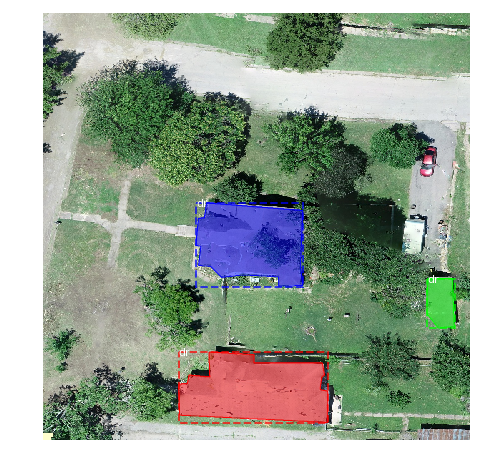

Processing 1 images
image                    shape: (1024, 1024, 3)       min:    0.00000  max:  255.00000  uint8
molded_images            shape: (1, 1024, 1024, 3)    min: -123.70000  max:  151.10000  float64
image_metas              shape: (1, 15)               min:    0.00000  max: 1024.00000  int64
anchors                  shape: (1, 261888, 4)        min:   -0.35390  max:    1.29134  float32


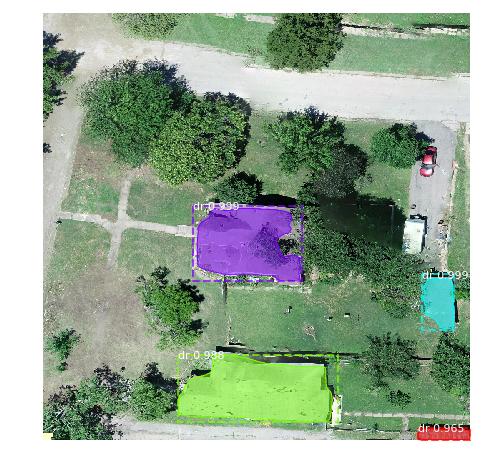

In [20]:
image_id = random.choice(valid_dataset.image_ids)
print(image_id)

original_image, image_meta, gt_class_id, gt_bbox, gt_mask =\
    modellib.load_image_gt(valid_dataset, inference_config, 
                           image_id, use_mini_mask=False)

print(valid_dataset.image_info[image_id]["path"])
log("original_image", original_image)
log("image_meta", image_meta)
#log("gt_class_id", gt_class_id) #if there is no class, this will be an error
#log("gt_bbox", gt_bbox)
#log("gt_mask", gt_mask)

visualize.display_instances(original_image, gt_bbox, gt_mask, gt_class_id, 
                            valid_dataset.class_names, figsize=(8, 8))

results = model.detect([original_image], verbose=1)

r = results[0]
visualize.display_instances(original_image, r['rois'], r['masks'], r['class_ids'], 
                            valid_dataset.class_names, r['scores'], ax=get_ax())